Import Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.15.0


In [4]:
import zipfile
import os
import random
import numpy as np

Extract Datasets

In [5]:
local_zip = '/content/SomaDataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

base_dir = '/content/SomaDataset'

In [6]:
os.listdir(base_dir)

['Endomorph', 'Mesomorph', 'Ectomorph']

In [7]:
ectomorph_dir = os.path.join(base_dir,'Ectomorph')
mesomorph_dir = os.path.join(base_dir,'Mesomorph')
endomorph_dir = os.path.join(base_dir,'Endomorph')

Print Amount of Data of Each Class

In [8]:
print("Ectomorph : ",len(os.listdir(ectomorph_dir)))
print("Mesomorph : ",len(os.listdir(mesomorph_dir)))
print("Endomorph : ",len(os.listdir(endomorph_dir)))

Ectomorph :  148
Mesomorph :  194
Endomorph :  142


Show Random Image

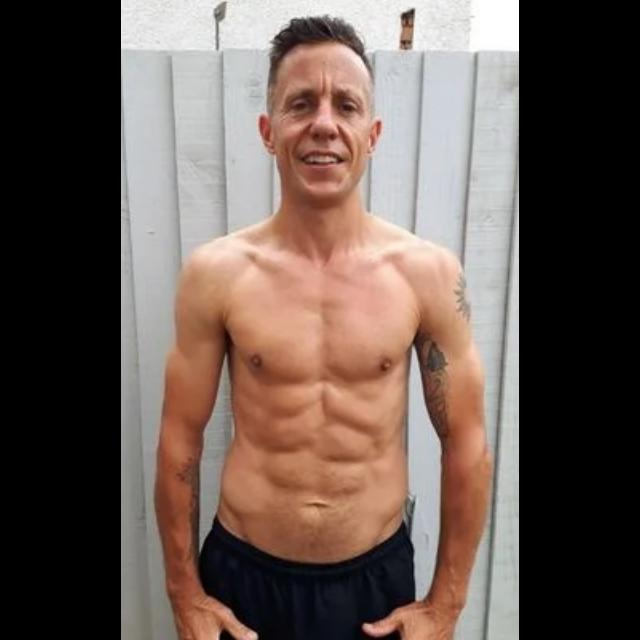

In [11]:
random_image = random.sample(os.listdir(ectomorph_dir), 1)
img = tf.keras.utils.load_img(f"{ectomorph_dir}/{random_image[0]}")
img

In [12]:
img = tf.keras.utils.img_to_array(img)
img.shape

(640, 640, 3)

Augment Data

In [13]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.2
)

In [14]:
train_dataset = train_datagen.flow_from_directory(
    base_dir,
    target_size=(200, 200),
    batch_size=32,
    classes=['Ectomorph', 'Endomorph', 'Mesomorph'],
    class_mode = 'categorical'
)

val_dataset = train_datagen.flow_from_directory(
    base_dir,
    target_size=(200, 200),
    batch_size=32,
    classes=['Ectomorph', 'Endomorph', 'Mesomorph'],
    class_mode = 'categorical'
)

Found 478 images belonging to 3 classes.
Found 478 images belonging to 3 classes.


In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

In [17]:
model.compile(loss = 'categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy']
)

Training Data

In [21]:
history = model.fit(
      train_dataset,
      epochs=20,
      validation_data=val_dataset,
      verbose=1,
)

Epoch 1/20
15/15 [==============================] - 46s 3s/step - loss: 1.0981 - accuracy: 0.3640 - val_loss: 1.0908 - val_accuracy: 0.3933
Epoch 2/20
15/15 [==============================] - 45s 3s/step - loss: 1.0882 - accuracy: 0.3745 - val_loss: 1.0801 - val_accuracy: 0.3933
Epoch 3/20
15/15 [==============================] - 46s 3s/step - loss: 1.0865 - accuracy: 0.4017 - val_loss: 1.0914 - val_accuracy: 0.4100
Epoch 4/20
15/15 [==============================] - 44s 3s/step - loss: 1.0881 - accuracy: 0.4038 - val_loss: 1.0710 - val_accuracy: 0.4393
Epoch 5/20
15/15 [==============================] - 37s 2s/step - loss: 1.0529 - accuracy: 0.4540 - val_loss: 1.0184 - val_accuracy: 0.4916
Epoch 6/20
15/15 [==============================] - 37s 2s/step - loss: 1.0367 - accuracy: 0.4393 - val_loss: 0.9583 - val_accuracy: 0.5188
Epoch 7/20
15/15 [==============================] - 46s 3s/step - loss: 0.9816 - accuracy: 0.5084 - val_loss: 0.9352 - val_accuracy: 0.5335
Epoch 8/20
15/15 [==

In [29]:
history = model.fit(
      train_dataset,
      epochs=10,
      validation_data=val_dataset,
      verbose=1
)

Epoch 1/10
15/15 [==============================] - 47s 3s/step - loss: 0.3680 - accuracy: 0.8745 - val_loss: 0.6514 - val_accuracy: 0.7113
Epoch 2/10
15/15 [==============================] - 46s 3s/step - loss: 0.3457 - accuracy: 0.8661 - val_loss: 0.3775 - val_accuracy: 0.8222
Epoch 3/10
15/15 [==============================] - 39s 3s/step - loss: 0.3700 - accuracy: 0.8556 - val_loss: 0.2492 - val_accuracy: 0.8996
Epoch 4/10
15/15 [==============================] - 53s 4s/step - loss: 0.3572 - accuracy: 0.8452 - val_loss: 0.2296 - val_accuracy: 0.9310
Epoch 5/10
15/15 [==============================] - 37s 2s/step - loss: 0.2394 - accuracy: 0.9289 - val_loss: 0.2860 - val_accuracy: 0.8912
Epoch 6/10
15/15 [==============================] - 47s 3s/step - loss: 0.2648 - accuracy: 0.9017 - val_loss: 0.1793 - val_accuracy: 0.9247
Epoch 7/10
15/15 [==============================] - 38s 3s/step - loss: 0.2973 - accuracy: 0.8703 - val_loss: 0.1687 - val_accuracy: 0.9414
Epoch 8/10
15/15 [==

Accuracy and Loss Result

In [30]:
train_accuracy = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]

val_accuracy = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Loss: {train_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

Train Accuracy: 0.9184
Train Loss: 0.2190
Validation Accuracy: 0.9686
Validation Loss: 0.0988


In [31]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Plot the Accuracy

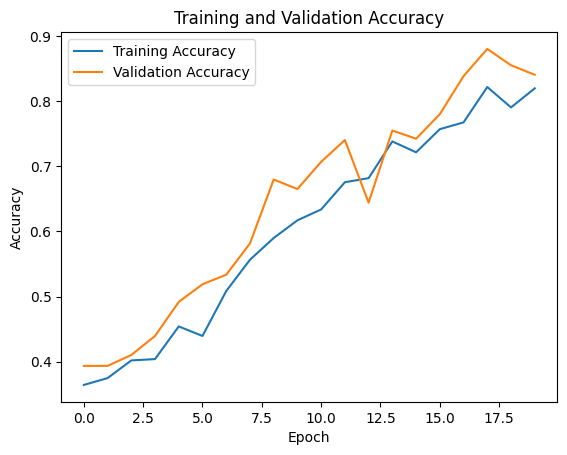

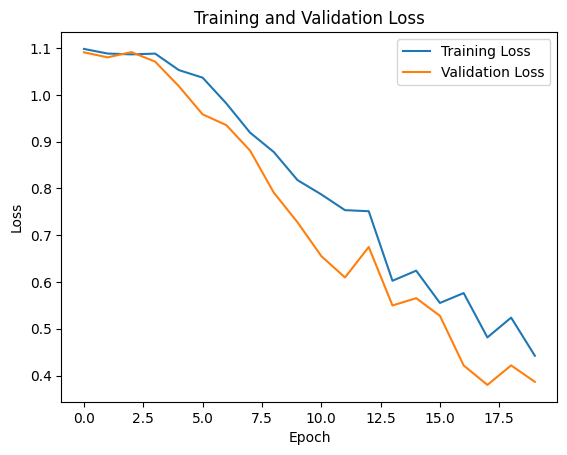

In [24]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Test Predict Images

Saving download.jpeg to download (8).jpeg
1/1 [==============================] - 0s 35ms/step
download (8).jpeg
Mesomorph


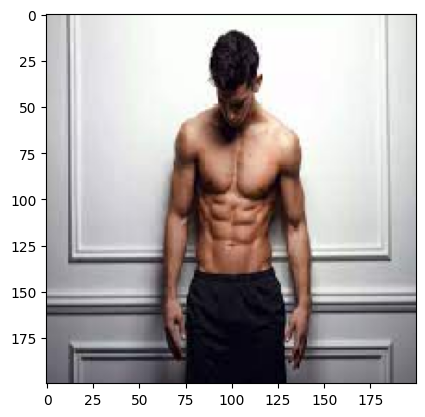

In [57]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200, 200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('Ectomorph')
  elif classes[0][1]==1:
    print('Endomorph')
  elif classes[0][2]==1:
    print('Mesomorph')
  else:
    print('unknown')

Save model to .h5 file

In [49]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
!pip install tensorflowjs

In [50]:
import tensorflowjs as tfjs

Convert into tensorflow.js

In [51]:
tfjs.converters.save_keras_model(model, 'content/tfjs_model')

Convert into Tensorflow Lite

In [52]:
import tensorflow as tf
from tensorflow import keras
from google.colab import files

# Load Keras model
model = keras.models.load_model('model.h5')

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

# Download the TFLite model
files.download('model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>